In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr
import glob
import os

os.chdir('/Users/vivekkanpa/Documents/UCD/sudoku-imputation/SUDOKU_BENCHMARK/')
os.getcwd()

'/Users/vivekkanpa/Documents/UCD/sudoku-imputation/SUDOKU_BENCHMARK'

In [2]:
def log_stats(sudoku_files):
    total_missing = dict()
    fallback_count = dict()
    model_training = dict()
    imputability = dict()
    
    for fn in sudoku_files:
        mp = float(fn.split('/')[-1].split('_')[1][0:3])
        #print(mp)
        mp_total_missing = []
        mp_fallback_count = []
        mp_model_training = []
        mp_imputability = []
        
        df = pd.read_json(fn)
        for col in df.T.columns:
            mp_total_missing.append(df.T[col]['round_1']['total_missing'])
            mp_fallback_count.append(df.T[col]['round_1']['median_fallback_count'])
            mp_model_training.append(df.T[col]['round_1']['model_training_attempts'])
            mp_imputability.append(df.T[col]['round_1']['imputability_ratio'])
            
        total_missing[mp] = mp_total_missing
        fallback_count[mp] = mp_fallback_count
        model_training[mp] = mp_model_training
        imputability[mp] = mp_imputability
    
    total_missing_df = pd.DataFrame(total_missing).T.reset_index().sort_values(by='index').set_index('index').T
    fallback_count_df = pd.DataFrame(fallback_count).T.reset_index().sort_values(by='index').set_index('index').T
    model_training_df = pd.DataFrame(model_training).T.reset_index().sort_values(by='index').set_index('index').T
    imputability_df = pd.DataFrame(imputability).T.reset_index().sort_values(by='index').set_index('index').T

    return total_missing_df, fallback_count_df, model_training_df, imputability_df

In [3]:
missingness_list = ['mcar', 'mnar', 'mar']
dataset = 'arcene'

missingness_stats_list = dict()
for missingness in missingness_list:
    missingness_type_stats = dict()
    sudoku_dir = f"outputs/{missingness}/{dataset}"
    sudoku_files = glob.glob(os.path.join(sudoku_dir, '*.json'))
    total_missing_df, fallback_count_df, model_training_df, imputability_df = log_stats(sudoku_files)
    missingness_type_stats['Total_missing_count'] = total_missing_df.sum()
    missingness_type_stats['Total_fallbacks_used'] = fallback_count_df.sum()
    missingness_type_stats['Total_models_trained'] = model_training_df.sum()
    missingness_type_stats['Average_imputability_ratio'] = imputability_df.mean()
    missingness_stats_list[missingness] = missingness_type_stats

In [4]:
gt = pd.read_csv(f"datasets/experimental_data/numerical/{dataset}/{dataset}_ground_truth.csv")

In [5]:
num_vals = gt.shape[0]*gt.shape[1]

In [6]:
mcar_logs = pd.DataFrame(missingness_stats_list['mcar'])
mnar_logs = pd.DataFrame(missingness_stats_list['mnar'])
mar_logs = pd.DataFrame(missingness_stats_list['mar'])

In [7]:
mcar_models = pd.DataFrame([mcar_logs['Total_missing_count'], mcar_logs['Total_models_trained']]).T
mcar_models['rows'] = gt.shape[0]
mcar_models['cols'] = gt.shape[1]
mcar_models['models_per_count'] = mcar_models['Total_models_trained']/mcar_models['Total_missing_count']
mcar_models['models_per_row'] = mcar_models['Total_models_trained']/mcar_models['rows']
mcar_models['models_per_col'] = mcar_models['Total_models_trained']/mcar_models['cols']
mcar_models

,Total_missing_count,Total_models_trained,rows,cols,models_per_count,models_per_row,models_per_col
index,,,,,,,
0.1,8914,2960,900,99,0.332062,3.288889,29.898990
0.2,17788,8413,900,99,0.472959,9.347778,84.979798
0.3,26720,14737,900,99,0.551534,16.374444,148.858586
0.4,35585,20243,900,99,0.568863,22.492222,204.474747
0.5,44464,8183,900,99,0.184037,9.092222,82.656566


In [8]:
mnar_models = pd.DataFrame([mnar_logs['Total_missing_count'], mnar_logs['Total_models_trained']]).T
mnar_models['rows'] = gt.shape[0]
mnar_models['cols'] = gt.shape[1]
mnar_models['models_per_count'] = mnar_models['Total_models_trained']/mnar_models['Total_missing_count']
mnar_models['models_per_row'] = mnar_models['Total_models_trained']/mnar_models['rows']
mnar_models['models_per_col'] = mnar_models['Total_models_trained']/mnar_models['cols']
mnar_models

,Total_missing_count,Total_models_trained,rows,cols,models_per_count,models_per_row,models_per_col
index,,,,,,,
0.1,5061,1531,900,99,0.302509,1.701111,15.464646
0.2,8149,2180,900,99,0.267517,2.422222,22.020202
0.3,10043,2186,900,99,0.217664,2.428889,22.080808
0.4,11476,2090,900,99,0.182119,2.322222,21.111111
0.5,12663,1966,900,99,0.155255,2.184444,19.858586


In [9]:
mar_models = pd.DataFrame([mar_logs['Total_missing_count'], mar_logs['Total_models_trained']]).T
mar_models['rows'] = gt.shape[0]
mar_models['cols'] = gt.shape[1]
mar_models['models_per_count'] = mar_models['Total_models_trained']/mar_models['Total_missing_count']
mar_models['models_per_row'] = mar_models['Total_models_trained']/mar_models['rows']
mar_models['models_per_col'] = mar_models['Total_models_trained']/mar_models['cols']
mar_models

,Total_missing_count,Total_models_trained,rows,cols,models_per_count,models_per_row,models_per_col
index,,,,,,,
0.1,8790,2866,900,99,0.326052,3.184444,28.949495
0.2,16913,7125,900,99,0.421274,7.916667,71.969697
0.3,23868,10690,900,99,0.447880,11.877778,107.979798
0.4,29684,12356,900,99,0.416251,13.728889,124.808081
0.5,34285,12544,900,99,0.365874,13.937778,126.707071


In [10]:
write = False
if write:
    mcar_models.to_csv(f'analysis/results_tables/log_analysis/mcar_{dataset}_models_trained.csv')
    mnar_models.to_csv(f'analysis/results_tables/log_analysis/mnar_{dataset}_models_trained.csv')
    mar_models.to_csv(f'analysis/results_tables/log_analysis/mar_{dataset}_models_trained.csv')

### Visualize

In [139]:
by_missingness = dict()
all_dfs = []
all_df_flat = []
for missingness in ['mcar', 'mnar', 'mar']:
    by_dataset = dict()
    these_dfs = []
    for dataset in ['eeg', 'qsar', 'arcene']:
        this_df = pd.read_csv(f'analysis/results_tables/log_analysis/{missingness}_{dataset}_models_trained.csv')
        this_df['dataset'] = [f'{dataset.upper()} {missingness.upper()}']*5
        by_dataset[dataset] = this_df
        these_dfs.append(this_df)
        all_df_flat.append(this_df)
    all_dfs.append(these_dfs)
    by_missingness[missingness] = by_dataset

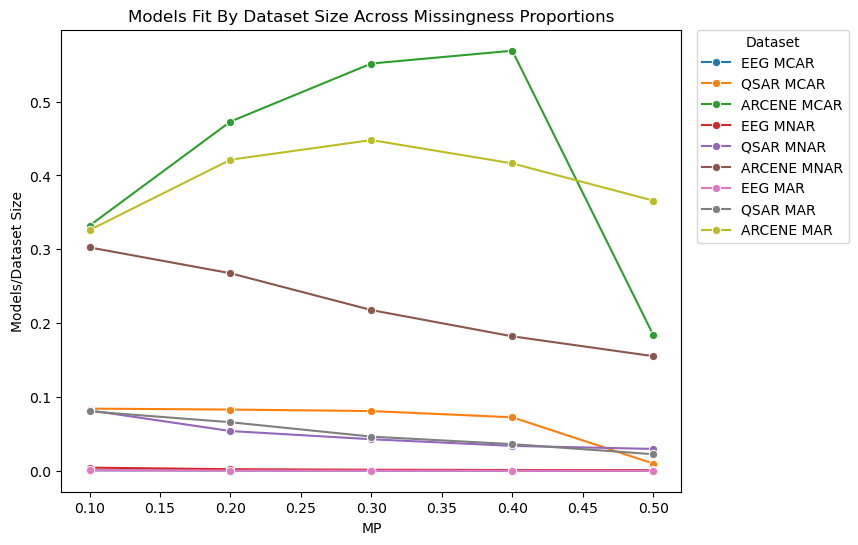

In [215]:
df_plot = pd.concat(all_df_flat, ignore_index=True)


import seaborn as sns
import matplotlib.pyplot as plt

# Line plot with seaborn
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_plot, x="index", y="models_per_count", hue="dataset", marker="o")

plt.title("Models Fit By Dataset Size Across Missingness Proportions")
plt.xlabel("MP")
plt.ylabel("Models/Dataset Size")
plt.legend(title="Dataset", bbox_to_anchor=(1.27, 1), loc='upper right', borderaxespad=0.)
plt.savefig('analysis/results_figures/comparison/models_fit_dataset_size.svg')
plt.savefig('analysis/results_figures/comparison/models_fit_dataset_size.png')
plt.show()

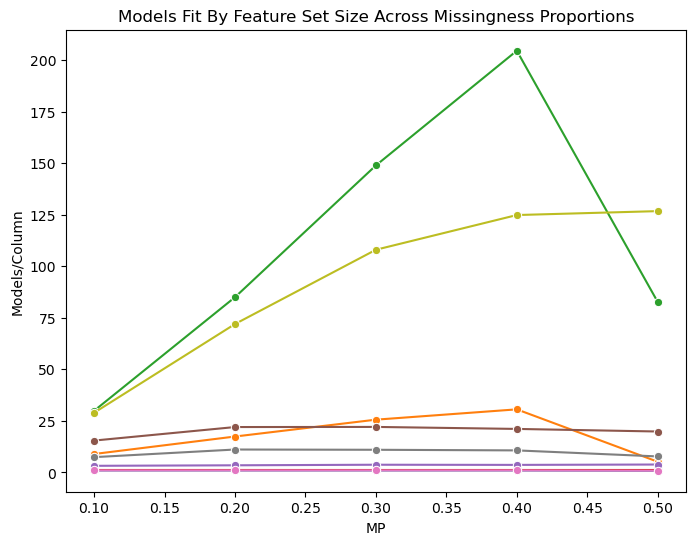

In [211]:
# Line plot with seaborn
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_plot, x="index", y="models_per_col", hue="dataset", marker="o")

plt.legend([], [], frameon=False)  # removes legend
plt.title("Models Fit By Feature Set Size Across Missingness Proportions")
plt.xlabel("MP")
plt.ylabel("Models/Column")
plt.savefig('analysis/results_figures/comparison/models_fit_dataset_cols.svg')
plt.savefig('analysis/results_figures/comparison/models_fit_dataset_cols.png')
plt.show()

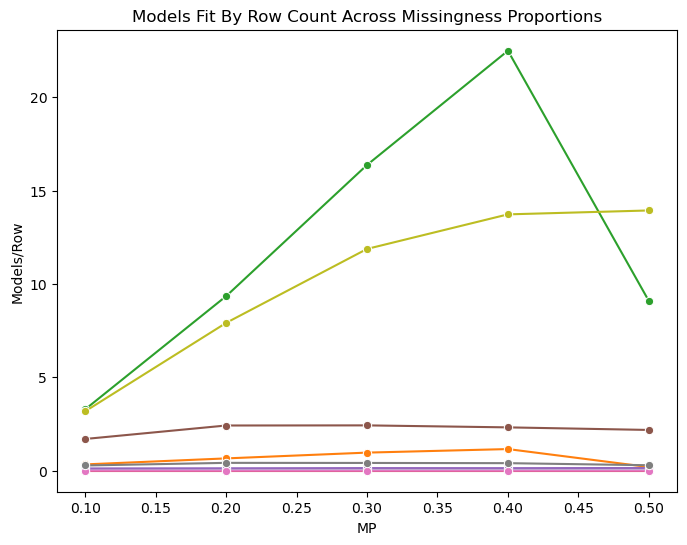

In [213]:
# Line plot with seaborn
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_plot, x="index", y="models_per_row", hue="dataset", marker="o")

plt.legend([], [], frameon=False)  # removes legend
plt.title("Models Fit By Row Count Across Missingness Proportions")
plt.xlabel("MP")
plt.ylabel("Models/Row")
plt.savefig('analysis/results_figures/comparison/models_fit_dataset_rows.svg')
plt.savefig('analysis/results_figures/comparison/models_fit_dataset_rows.png')
plt.show()

In [209]:
os.getcwd()

'/Users/vivekkanpa/Documents/UCD/sudoku-imputation/SUDOKU_BENCHMARK'

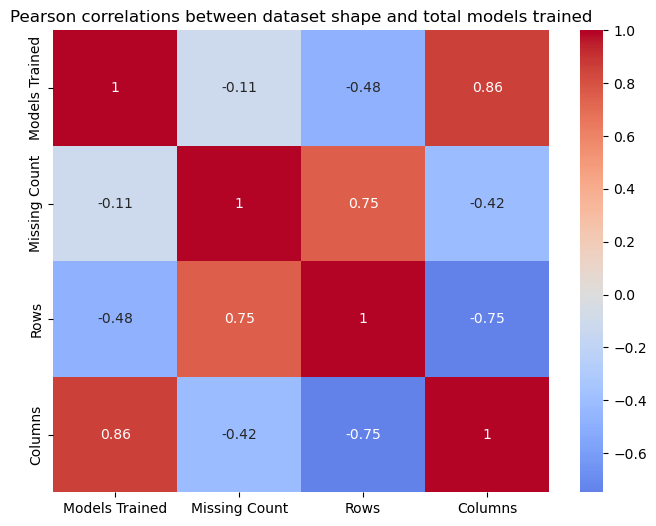

In [219]:
import matplotlib.pyplot as plt
import seaborn as sns

# ---- 3. Correlation heatmap ----

rename_map = {
    "Total_models_trained": "Models Trained",
    "Total_missing_count": "Missing Count",
    "rows": "Rows",
    "cols": "Columns"
}

corr = df_all[["Total_models_trained", "Total_missing_count", "rows", "cols"]] \
              .rename(columns=rename_map) \
              .corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Pearson correlations between dataset shape and total models trained")
plt.savefig('analysis/results_figures/comparison/heatmap_models_trained.svg')
plt.savefig('analysis/results_figures/comparison/heatmap_models_trained.png')
plt.show()


In [225]:
df_plot

,index,Total_missing_count,Total_models_trained,rows,cols,models_per_count,models_per_row,models_per_col,dataset
0,0.1,19529,13,14980,13,0.000666,0.000868,1.000000,EEG MCAR
1,0.2,38867,13,14980,13,0.000334,0.000868,1.000000,EEG MCAR
2,0.3,58171,13,14980,13,0.000223,0.000868,1.000000,EEG MCAR
3,0.4,77725,13,14980,13,0.000167,0.000868,1.000000,EEG MCAR
4,0.5,97144,11,14980,13,0.000113,0.000734,0.846154,EEG MCAR
5,0.1,4252,358,1055,40,0.084196,0.339336,8.950000,QSAR MCAR
6,0.2,8404,697,1055,40,0.082937,0.660664,17.425000,QSAR MCAR
7,0.3,12657,1024,1055,40,0.080904,0.970616,25.600000,QSAR MCAR
8,0.4,16890,1224,1055,40,0.072469,1.160190,30.600000,QSAR MCAR
9,0.5,21098,208,1055,40,0.009859,0.197156,5.200000,QSAR MCAR
